In [18]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path

We are checking how the threshold affects the runtime. We keep other parameters at default.

In [2]:
# A function which can sort dataframes in a list of a dataframes. Based on bubble sort.
def sort_dataframe(dataframes: list, key: str):
    swapped = True
    while (swapped):
        swapped = False
        for i in range(len(dataframes)-1):
            # dataframes[i] gives us the ith dataframe, dataframes[i][key] gives us the right column and 
            # dataframes[i][key][0] gives us the first element of that column. We can do this because 
            # key should be equal for the whole column.
            a = dataframes[i][key][0]
            b = dataframes[i+1][key][0]
            if a > b:
                temp = dataframes[i]
                dataframes[i] = dataframes[i+1]
                dataframes[i+1] = temp
                swapped = True

In [3]:
# We load data
base_case_files = glob.glob(path.join("..", "cpp", "uni-machine", "v0.1.12", "base_case", "*.csv"))
dfs_base_case = [pd.read_csv(f) for f in base_case_files]

In [4]:
# We calculate runtime per integer
for df in dfs_base_case:
    df["runtime/integer [ns]"] = df["total_runtime"] / (df["total_runs"] * df["integers"])

Text(0.5, 1.0, 'Comapring cip_shuffle threshold')

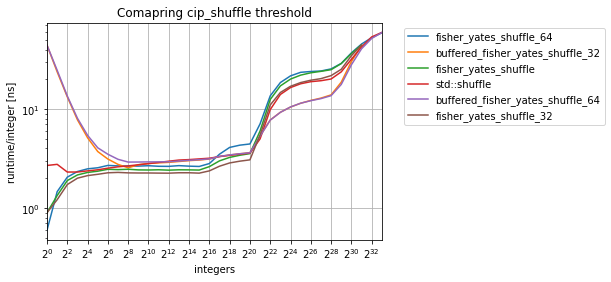

In [5]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 35, 2)]
ax_yticks = [5 * i for i in range(0, 20, 1)]

ax = dfs_base_case[0].plot(x="integers", y="runtime/integer [ns]", label=dfs_base_case[0]["function"][0])
for i in range(1, len(dfs_base_case)):
    dfs_base_case[i].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_base_case[i]["function"][0] )

ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
# ax.set_yticks(ax_yticks)
ax.set_xlim(2**0, 2**33)
# ax.set_ylim(0, 65)
ax.grid(True)
ax.set_xlabel("integers")
ax.set_ylabel("runtime/integer [ns]")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_title("Comapring cip_shuffle threshold")

Lools like ? is the way to go!

Text(0.5, 1.0, 'Comapring cip_shuffle threshold')

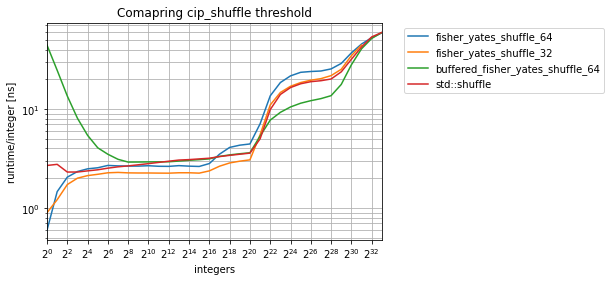

In [9]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 35, 2)]
ax_yticks = [5 * i for i in range(0, 20, 1)]

ax = dfs_base_case[0].plot(x="integers", y="runtime/integer [ns]", label=dfs_base_case[0]["function"][0])
dfs_base_case[2].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_base_case[2]["function"][0])
dfs_base_case[5].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_base_case[5]["function"][0])
dfs_base_case[3].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_base_case[3]["function"][0])

ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
# ax.set_yticks(ax_yticks)
ax.set_xlim(2**0, 2**33)
# ax.set_ylim(0, 65)
ax.grid(True, which="both")
ax.set_xlabel("integers")
ax.set_ylabel("runtime/integer [ns]")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_title("Standard Shuffle und Fisher-Yates")

Text(0.5, 1.0, 'Comapring cip_shuffle threshold')

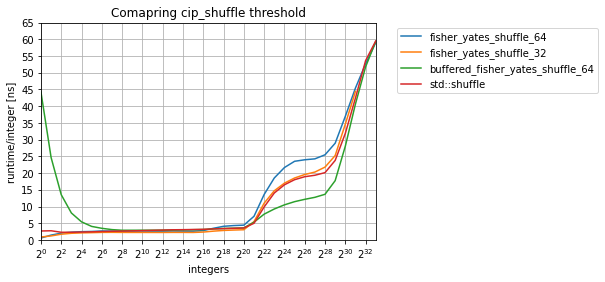

In [7]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 35, 2)]
ax_yticks = [5 * i for i in range(0, 20, 1)]

ax = dfs_base_case[3].plot(x="integers", y="runtime/integer [ns]", label=dfs_base_case[3]["function"][0])
dfs_base_case[2].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_base_case[2]["function"][0])
dfs_base_case[5].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_base_case[5]["function"][0])
dfs_base_case[0].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_base_case[0]["function"][0])

ax.set_xscale("log", base=2)
# ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
ax.set_yticks(ax_yticks)
ax.set_xlim(2**0, 2**33)
ax.set_ylim(0, 65)
ax.grid(True)
ax.set_xlabel("integers")
ax.set_ylabel("runtime/integer [ns]")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_title("Comapring cip_shuffle threshold")

Text(0.5, 1.0, 'Comapring cip_shuffle threshold')

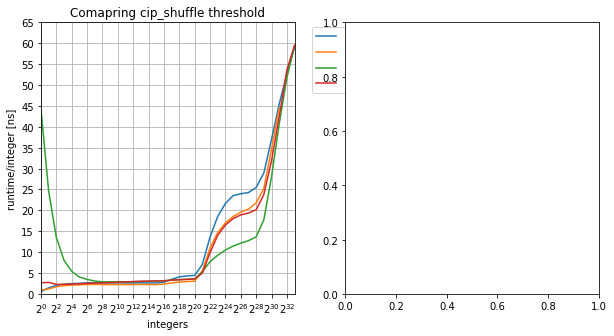

In [8]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 35, 2)]
ax_yticks = [5 * i for i in range(0, 20, 1)]

fig, axes = plt.subplots(1, 2, figsize=(10,5))

dfs_base_case[3].plot(ax=axes[0], x="integers", y="runtime/integer [ns]", label=dfs_base_case[3]["function"][0])
dfs_base_case[2].plot(ax=axes[0], x="integers", y="runtime/integer [ns]", label=dfs_base_case[2]["function"][0])
dfs_base_case[5].plot(ax=axes[0], x="integers", y="runtime/integer [ns]", label=dfs_base_case[5]["function"][0])
dfs_base_case[0].plot(ax=axes[0], x="integers", y="runtime/integer [ns]", label=dfs_base_case[0]["function"][0])

axes[0].set_xscale("log", base=2)
# ax.set_yscale("log", base=10)
axes[0].set_xticks(ax_xticks)
axes[0].set_yticks(ax_yticks)
axes[0].set_xlim(2**0, 2**33)
axes[0].set_ylim(0, 65)
axes[0].grid(True)
axes[0].set_xlabel("integers")
axes[0].set_ylabel("runtime/integer [ns]")
axes[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
axes[0].set_title("Comapring cip_shuffle threshold")

Let's query the important ones!

In [12]:
# Lets compare the other ones
df_std_shuffle = pd.read_csv(path.join("..", "cpp", "uni-machine", "v0.1.12", "base_case", "20231217-192420-nb=32-bf=256-th=262144-cpp.csv"))
df_fy_shuffle = pd.read_csv(path.join("..", "cpp", "uni-machine", "v0.1.12", "base_case", "20231217-215810-nb=32-bf=256-th=262144-cpp.csv"))
df_fy_shuffle_32 = pd.read_csv(path.join("..", "cpp", "uni-machine", "v0.1.12", "base_case", "20231217-224305-nb=32-bf=256-th=262144-cpp.csv"))
df_fy_shuffle_64 = pd.read_csv(path.join("..", "cpp", "uni-machine", "v0.1.12", "base_case", "20231217-225627-nb=32-bf=256-th=262144-cpp.csv"))

In [13]:
df_std_shuffle["runtime/integer [ns]"] = df_std_shuffle["total_runtime"] / (df_std_shuffle["total_runs"] * df_std_shuffle["integers"])
df_fy_shuffle["runtime/integer [ns]"] = df_fy_shuffle["total_runtime"] / (df_fy_shuffle["total_runs"] * df_fy_shuffle["integers"])
df_fy_shuffle_32["runtime/integer [ns]"] = df_fy_shuffle_32["total_runtime"] / (df_fy_shuffle_32["total_runs"] * df_fy_shuffle_32["integers"])
df_fy_shuffle_64["runtime/integer [ns]"] = df_fy_shuffle_64["total_runtime"] / (df_fy_shuffle_64["total_runs"] * df_fy_shuffle_64["integers"])

Text(0.5, 1.0, 'Standard Shuffle und Fisher-Yates')

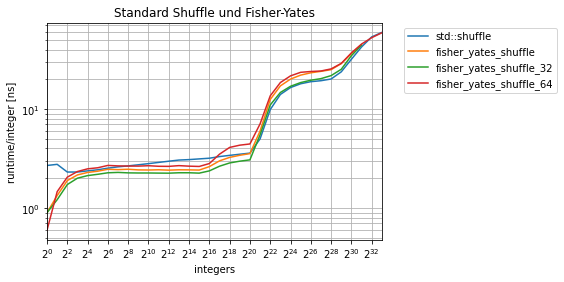

In [15]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 35, 2)]
ax_yticks = [5 * i for i in range(0, 20, 1)]

ax = df_std_shuffle.plot(x="integers", y="runtime/integer [ns]", label=df_std_shuffle["function"][0])
df_fy_shuffle.plot(ax=ax, x="integers", y="runtime/integer [ns]", label=df_fy_shuffle["function"][0])
df_fy_shuffle_32.plot(ax=ax, x="integers", y="runtime/integer [ns]", label=df_fy_shuffle_32["function"][0])
df_fy_shuffle_64.plot(ax=ax, x="integers", y="runtime/integer [ns]", label=df_fy_shuffle_64["function"][0])

ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
# ax.set_yticks(ax_yticks)
ax.set_xlim(2**0, 2**33)
# ax.set_ylim(0, 65)
ax.grid(True, which="both")
ax.set_xlabel("integers")
ax.set_ylabel("runtime/integer [ns]")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_title("Standard Shuffle und Fisher-Yates")

We chack base_case:

In [19]:
# Lets compare the other ones
df_std_shuffle = pd.read_csv(path.join("..", "cpp", "uni-machine", "v0.1.12", "base_case", "20231217-192420-nb=32-bf=256-th=262144-cpp.csv"))
df_fy_shuffle = pd.read_csv(path.join("..", "cpp", "uni-machine", "v0.1.12", "base_case", "20231217-215810-nb=32-bf=256-th=262144-cpp.csv"))
df_fy_shuffle_32 = pd.read_csv(path.join("..", "cpp", "uni-machine", "v0.1.12", "base_case", "20231217-224305-nb=32-bf=256-th=262144-cpp.csv"))
df_fy_shuffle_64 = pd.read_csv(path.join("..", "cpp", "uni-machine", "v0.1.12", "base_case", "20231217-225627-nb=32-bf=256-th=262144-cpp.csv"))
df_buffered = pd.read_csv(path.join("..", "cpp", "uni-machine", "v0.1.12", "buffered", "20231214-211310-nb=0-bf=256-th=0-cpp.csv"))

In [20]:
df_std_shuffle["runtime/integer [ns]"] = df_std_shuffle["total_runtime"] / (df_std_shuffle["total_runs"] * df_std_shuffle["integers"])
df_fy_shuffle["runtime/integer [ns]"] = df_fy_shuffle["total_runtime"] / (df_fy_shuffle["total_runs"] * df_fy_shuffle["integers"])
df_fy_shuffle_32["runtime/integer [ns]"] = df_fy_shuffle_32["total_runtime"] / (df_fy_shuffle_32["total_runs"] * df_fy_shuffle_32["integers"])
df_fy_shuffle_64["runtime/integer [ns]"] = df_fy_shuffle_64["total_runtime"] / (df_fy_shuffle_64["total_runs"] * df_fy_shuffle_64["integers"])
df_buffered["runtime/integer [ns]"] = df_buffered["total_runtime"] / (df_buffered["total_runs"] * df_buffered["integers"])

Text(0.5, 1.0, 'FY-Shuffle 32 Bit vs Buffered')

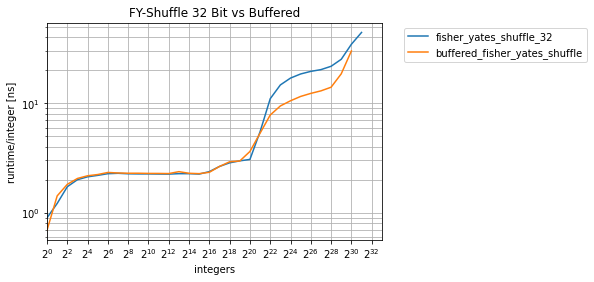

In [22]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 35, 2)]
ax_yticks = [5 * i for i in range(0, 20, 1)]

# ax = df_std_shuffle.plot(x="integers", y="runtime/integer [ns]", label=df_std_shuffle["function"][0])
# df_fy_shuffle.plot(ax=ax, x="integers", y="runtime/integer [ns]", label=df_fy_shuffle["function"][0])
# df_fy_shuffle_32.plot(ax=ax, x="integers", y="runtime/integer [ns]", label=df_fy_shuffle_32["function"][0])
# df_fy_shuffle_64.plot(ax=ax, x="integers", y="runtime/integer [ns]", label=df_fy_shuffle_64["function"][0])
# df_buffered.plot(ax=ax, x="integers", y="runtime/integer [ns]", label=df_buffered["function"][0])

ax2 = df_fy_shuffle_32.plot(x="integers", y="runtime/integer [ns]", label=df_fy_shuffle_32["function"][0])
df_buffered.plot(ax=ax2, x="integers", y="runtime/integer [ns]", label=df_buffered["function"][0])

ax2.set_xscale("log", base=2)
ax2.set_yscale("log", base=10)
ax2.set_xticks(ax_xticks)
# ax2.set_yticks(ax_yticks)
ax2.set_xlim(2**0, 2**33)
# ax2.set_ylim(0, 65)
ax2.grid(True, which="both")
ax2.set_xlabel("integers")
ax2.set_ylabel("runtime/integer [ns]")
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax2.set_title("FY-Shuffle 32 Bit vs Buffered")